In [9]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
requests=pd.read_csv("data.csv",sep=",",header=0)
requests.index=requests['hotel_id']
requests=requests.drop(['Unnamed: 0'], axis=1)
requests=requests.drop(['Unnamed: 0.1'], axis=1)
requests=requests.drop(['index'], axis=1)
requests=requests.drop(['hotel_id'],axis=1)
requests=requests.drop(['hotel_id.1'],axis=1)
requests.head()

,group,brand,city,parking,pool,children_policy,price,stock,date,language,mobile,avatar_name
hotel_id,,,,,,,,,,,,
0,Morriott International,Corlton,amsterdam,1,1,0,366,14,10,austrian,0,laulau
1,Accar Hotels,Safitel,amsterdam,1,0,0,359,10,10,austrian,0,laulau
2,Yin Yang,Ardisson,amsterdam,1,1,0,193,10,10,austrian,0,laulau
3,Boss Western,Boss Western,amsterdam,0,0,0,205,4,10,austrian,0,laulau
4,Accar Hotels,Ibas,amsterdam,1,0,0,86,0,10,austrian,0,laulau


In [23]:
requests["group"]=pd.Categorical(requests["group"],ordered=False)
requests["parking"]=pd.Categorical(requests["parking"],ordered=False)
requests["pool"]=pd.Categorical(requests["pool"],ordered=False)
requests["brand"]=pd.Categorical(requests["brand"],ordered=False)
requests["children_policy"]=pd.Categorical(requests["children_policy"],ordered=False)
requests["language"]=pd.Categorical(requests["language"],ordered=False)
requests["mobile"]=pd.Categorical(requests["mobile"],ordered=False)
requests["city"]=pd.Categorical(requests["city"],ordered=False)

In [24]:
price=requests["price"]
X_train,X_test,price_train,price_test=train_test_split(requests,price,test_size=0.25,random_state=11)

In [25]:
X_train.head()
#X_test.head()

,group,brand,city,parking,pool,children_policy,price,stock,date,language,mobile,avatar_name
hotel_id,,,,,,,,,,,,
90830,Morriott International,Morriot,vienna,0,0,1,184,38,15,swedish,0,laulau
79877,Accar Hotels,Ibas,sofia,0,0,0,61,7,20,dutch,0,laulau
50928,Accar Hotels,Marcure,paris,0,0,0,221,33,20,polish,1,laulau
32762,Morriott International,Corlton,madrid,1,1,0,212,88,25,italian,0,laulau
41117,Chillton Worldwide,Tripletree,paris,0,1,1,211,14,15,cypriot,0,laulau


,group,brand,city,parking,pool,children_policy,price,stock,date,language,mobile,avatar_name
hotel_id,,,,,,,,,,,,
90830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
97617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
X_train.shape

(74236, 12)

In [34]:
rf= RandomForestRegressor(n_estimators=400,max_features=2)
rfFit=rf.fit(X_train, price_train)
# Importance décroissante des variables
feature_importance_df = pd.DataFrame({
    'Feature' : X_train.columns,
    'Importance' : rfFit.feature_importances_
}).sort_values(by='Importance', ascending=False)
feature_importance_df

ValueError: could not convert string to float: 'Morriott International'

In [ ]:
param=[{"n_estimators":list(range(50,1000,50)),"max_features":list(range(2,10,1)) }]
n_features = np.shape(X_train)[1]
rf= GridSearchCV(RandomForestRegressor(),
        param,cv=10,n_jobs=-1)
rfOpt=rf.fit(X_train, price_train)

#n_features

NameError: name 'feature_importance_df' is not defined

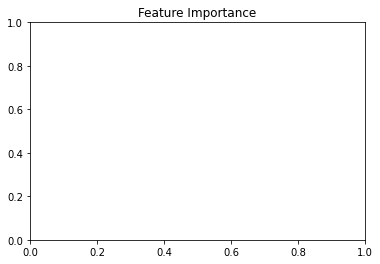

In [22]:
plt.title('Feature Importance')
sns.barplot(data = feature_importance_df.head(20), x='Importance', y='Feature');

In [ ]:
#Calcul de la valeur absolue des erreurs
predictions = rfOpt.predict(Xr_test)
print("MSE=",mean_squared_error(predictions,Yreg_test))
print("R2=",r2_score(Yreg_test,predictions))

In [ ]:
x = np.linspace(1,np.shape(Yreg_test)[0],np.shape(Yreg_test)[0])
plt.scatter(x,Yreg_test,label='actual')
plt.scatter(x,predictions,s=10,c='red',label='predictions')
plt.legend()